## Importation des bibliothèques

In [1]:
# Pour le Donnné
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# Pour le traitement du donné
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import time

## 1. Analyse et Nettoyage des Données

In [2]:
# Charger les données
df = pd.read_csv('credit_card_fraud_10k.csv')

# Analyse initiale
print("=== ANALYSE INITIALE ===")
print(f"Dimensions: {df.shape}")
print(f"\nTypes de données:")
print(df.dtypes)
print(f"\nValeurs manquantes:")
print(df.isnull().sum())
print(f"\nStatistiques descriptives:")
print(df.describe())
print(f"\nDistribution de la cible (is_fraud):")
print(df['is_fraud'].value_counts())
print(f"Pourcentage de fraude: {df['is_fraud'].mean()*100:.2f}%")

# Nettoyage des données
print("\n=== NETTOYAGE DES DONNÉES ===")

# Vérifier les doublons
duplicates = df.duplicated().sum()
print(f"Doublons trouvés: {duplicates}")

# Encoder les variables catégorielles
label_encoder = LabelEncoder()
df['merchant_category_encoded'] = label_encoder.fit_transform(df['merchant_category'])

# Vérifier les valeurs aberrantes
print("\nDétection des valeurs aberrantes:")
for col in ['amount', 'transaction_hour', 'device_trust_score', 'velocity_last_24h', 'cardholder_age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    print(f"{col}: {outliers} outliers ({outliers/len(df)*100:.2f}%)")

# Préparation des données
X = df.drop(['transaction_id', 'merchant_category', 'is_fraud'], axis=1)
y = df['is_fraud']

# Vérifier l'équilibre des classes
print(f"\nDistribution des classes: {y.value_counts().to_dict()}")
print(f"Ratio majoritaire/minoritaire: {y.value_counts()[0]/y.value_counts()[1]:.2f}:1")

# Séparation train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n=== DONNÉES PRÉPARÉES ===")
print(f"Train set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
print(f"Train fraud rate: {y_train.mean()*100:.2f}%")
print(f"Test fraud rate: {y_test.mean()*100:.2f}%")

=== ANALYSE INITIALE ===
Dimensions: (10000, 10)

Types de données:
transaction_id           int64
amount                 float64
transaction_hour         int64
merchant_category       object
foreign_transaction      int64
location_mismatch        int64
device_trust_score       int64
velocity_last_24h        int64
cardholder_age           int64
is_fraud                 int64
dtype: object

Valeurs manquantes:
transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

Statistiques descriptives:
       transaction_id        amount  transaction_hour  foreign_transaction  \
count     10000.00000  10000.000000      10000.000000         10000.000000   
mean       5000.50000    175.949849         11.593300             0.097800   
std        2886.89568    175.392827          6.922708         

## 2. Comparaison des 8 Modèles


DÉMARRAGE DE LA COMPARAISON DES MODÈLES

Entraînement du modèle: Logistic Regression
Matrice de confusion:
[[1887   83]
 [   0   30]]
Meilleurs paramètres: {'C': 10, 'solver': 'liblinear'}
F1-Score: 0.4196
ROC-AUC: 0.9927

Entraînement du modèle: Decision Tree
Matrice de confusion:
[[1969    1]
 [   0   30]]
Meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 2}
F1-Score: 0.9836
ROC-AUC: 0.9997

Entraînement du modèle: Random Forest
Matrice de confusion:
[[1970    0]
 [  12   18]]
Meilleurs paramètres: {'max_depth': 10, 'n_estimators': 100}
F1-Score: 0.7500
ROC-AUC: 0.9999

Entraînement du modèle: Gradient Boosting
Matrice de confusion:
[[1969    1]
 [   0   30]]
Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
F1-Score: 0.9836
ROC-AUC: 1.0000

Entraînement du modèle: AdaBoost
Matrice de confusion:
[[1970    0]
 [   0   30]]
Meilleurs paramètres: {'learning_rate': 0.5, 'n_estimators': 100}
F1-Score: 1.0000
ROC-AUC: 1.0000

Entraînement du modè

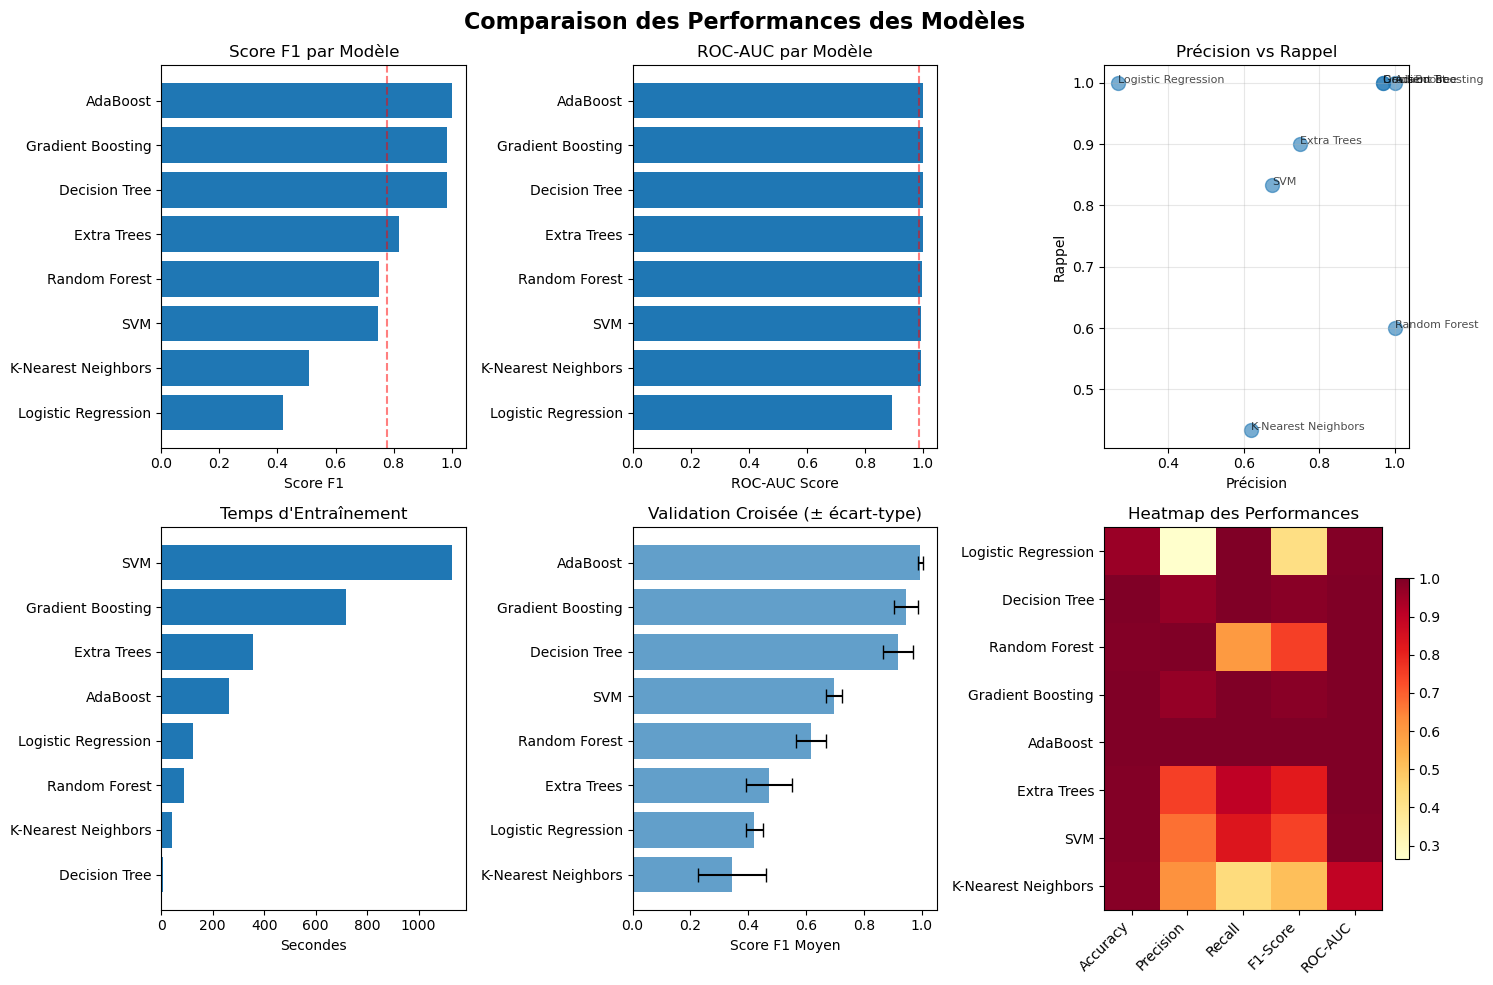

<Figure size 640x480 with 0 Axes>

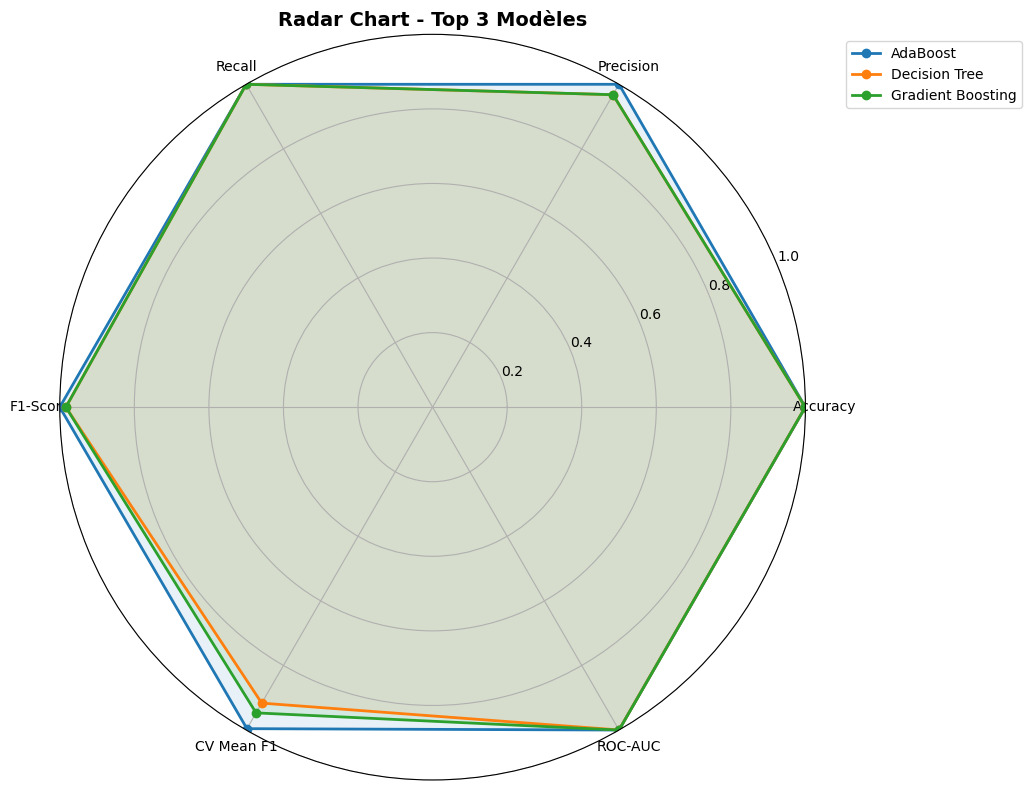


RAPPORT FINAL - ANALYSE COMPARATIVE

MEILLEURS MODÈLES PAR MÉTRIQUE:
Accuracy: AdaBoost (1.0000)
Precision: Random Forest (1.0000)
Recall: Logistic Regression (1.0000)
F1-Score: AdaBoost (1.0000)
ROC-AUC: Gradient Boosting (1.0000)

RECOMMANDATION - Meilleur modèle global:
Modèle: AdaBoost
Score F1: 1.0000
ROC-AUC: 1.0000
Précision: 1.0000
Rappel: 1.0000

Meilleurs hyperparamètres: {'learning_rate': 0.5, 'n_estimators': 100}

Résultats sauvegardés dans 'model_comparison_results_sklearn.csv'


<Figure size 640x480 with 0 Axes>

In [3]:
class ModelComparer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = {}
        self.results = pd.DataFrame()
        
    def define_models(self):
        """Définir les 8 modèles scikit-learn avec leurs hyperparamètres"""
        self.models = {
            'Logistic Regression': {
                'model': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
                'params': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
            },
            'Decision Tree': {
                'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                'params': {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
            },
            'Random Forest': {
                'model': RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
                'params': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
            },
            'Gradient Boosting': {
                'model': GradientBoostingClassifier(random_state=42),
                'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
            },
            'AdaBoost': {
                'model': AdaBoostClassifier(random_state=42),
                'params': {'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]}
            },
            'Extra Trees': {
                'model': ExtraTreesClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
                'params': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
            },
            'SVM': {
                'model': SVC(random_state=42, probability=True, class_weight='balanced'),
                'params': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']}
            },
            'K-Nearest Neighbors': {
                'model': KNeighborsClassifier(n_jobs=-1),
                'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
            }
        }
    
    def train_and_evaluate(self):
        """Entraîner et évaluer tous les modèles"""
        results_list = []
        
        for name, model_info in self.models.items():
            print(f"\n{'='*50}")
            print(f"Entraînement du modèle: {name}")
            print('='*50)
            
            start_time = time.time()
            
            # Validation croisée
            cv_scores = cross_val_score(
                model_info['model'], 
                self.X_train, 
                self.y_train, 
                cv=5, 
                scoring='f1',
                n_jobs=-1
            )
            
            # Recherche d'hyperparamètres
            try:
                grid_search = GridSearchCV(
                    model_info['model'],
                    model_info['params'],
                    cv=3,
                    scoring='f1',
                    n_jobs=-1,
                    verbose=0
                )
                
                grid_search.fit(self.X_train, self.y_train)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_
                
            except Exception as e:
                print(f"Erreur GridSearch pour {name}: {e}")
                # Utiliser le modèle par défaut
                best_model = model_info['model']
                best_model.fit(self.X_train, self.y_train)
                best_params = "default"
            
            # Prédictions
            y_pred = best_model.predict(self.X_test)
            
            # Gérer predict_proba pour SVM et KNN
            try:
                y_pred_proba = best_model.predict_proba(self.X_test)[:, 1]
                roc_auc = roc_auc_score(self.y_test, y_pred_proba)
            except:
                # Pour certains modèles qui n'ont pas predict_proba
                roc_auc = 0.0
            
            # Métriques
            metrics = {
                'Model': name,
                'Accuracy': accuracy_score(self.y_test, y_pred),
                'Precision': precision_score(self.y_test, y_pred, zero_division=0),
                'Recall': recall_score(self.y_test, y_pred, zero_division=0),
                'F1-Score': f1_score(self.y_test, y_pred, zero_division=0),
                'ROC-AUC': roc_auc,
                'CV Mean F1': cv_scores.mean(),
                'CV Std F1': cv_scores.std(),
                'Training Time (s)': time.time() - start_time,
                'Best Params': str(best_params)
            }
            
            results_list.append(metrics)
            
            # Matrice de confusion
            cm = confusion_matrix(self.y_test, y_pred)
            print(f"Matrice de confusion:\n{cm}")
            print(f"Meilleurs paramètres: {best_params}")
            print(f"F1-Score: {metrics['F1-Score']:.4f}")
            if roc_auc > 0:
                print(f"ROC-AUC: {metrics['ROC-AUC']:.4f}")
        
        self.results = pd.DataFrame(results_list)
        return self.results
    
    def display_results_table(self):
        """Afficher les résultats dans un tableau"""
        print("\n" + "="*80)
        print("COMPARAISON DES MODÈLES - RÉSULTATS DÉTAILLÉS")
        print("="*80)
        
        # Formater le dataframe pour l'affichage
        display_df = self.results.copy()
        display_df = display_df.sort_values('F1-Score', ascending=False)
        
        # Arrondir les valeurs
        numeric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 
                       'ROC-AUC', 'CV Mean F1', 'CV Std F1', 'Training Time (s)']
        for col in numeric_cols:
            if col in display_df.columns:
                display_df[col] = display_df[col].round(4)
        
        # Afficher le tableau
        print(display_df.to_string(index=False))
        
        return display_df
    
    def plot_comparison(self):
        """Créer des visualisations comparatives"""
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('Comparaison des Performances des Modèles', fontsize=16, fontweight='bold')
        
        # 1. Scores F1
        models_sorted = self.results.sort_values('F1-Score')['Model']
        f1_scores = self.results.sort_values('F1-Score')['F1-Score']
        
        axes[0, 0].barh(range(len(models_sorted)), f1_scores)
        axes[0, 0].set_yticks(range(len(models_sorted)))
        axes[0, 0].set_yticklabels(models_sorted)
        axes[0, 0].set_xlabel('Score F1')
        axes[0, 0].set_title('Score F1 par Modèle')
        axes[0, 0].axvline(x=self.results['F1-Score'].mean(), color='r', linestyle='--', alpha=0.5)
        
        # 2. ROC-AUC
        if 'ROC-AUC' in self.results.columns:
            roc_scores = self.results.sort_values('ROC-AUC')['ROC-AUC']
            axes[0, 1].barh(range(len(models_sorted)), roc_scores)
            axes[0, 1].set_yticks(range(len(models_sorted)))
            axes[0, 1].set_yticklabels(models_sorted)
            axes[0, 1].set_xlabel('ROC-AUC Score')
            axes[0, 1].set_title('ROC-AUC par Modèle')
            axes[0, 1].axvline(x=self.results['ROC-AUC'].mean(), color='r', linestyle='--', alpha=0.5)
        
        # 3. Précision vs Rappel
        axes[0, 2].scatter(self.results['Precision'], self.results['Recall'], s=100, alpha=0.6)
        for i, model in enumerate(self.results['Model']):
            axes[0, 2].annotate(model, 
                               (self.results['Precision'][i], self.results['Recall'][i]),
                               fontsize=8, alpha=0.7)
        axes[0, 2].set_xlabel('Précision')
        axes[0, 2].set_ylabel('Rappel')
        axes[0, 2].set_title('Précision vs Rappel')
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Temps d'entraînement
        time_sorted = self.results.sort_values('Training Time (s)')
        axes[1, 0].barh(range(len(time_sorted)), time_sorted['Training Time (s)'])
        axes[1, 0].set_yticks(range(len(time_sorted)))
        axes[1, 0].set_yticklabels(time_sorted['Model'])
        axes[1, 0].set_xlabel('Secondes')
        axes[1, 0].set_title('Temps d\'Entraînement')
        
        # 5. Scores de validation croisée
        cv_means = self.results.sort_values('CV Mean F1')['CV Mean F1']
        cv_stds = self.results.sort_values('CV Mean F1')['CV Std F1']
        cv_models = self.results.sort_values('CV Mean F1')['Model']
        
        axes[1, 1].barh(range(len(cv_models)), cv_means, xerr=cv_stds, 
                       alpha=0.7, ecolor='black', capsize=5)
        axes[1, 1].set_yticks(range(len(cv_models)))
        axes[1, 1].set_yticklabels(cv_models)
        axes[1, 1].set_xlabel('Score F1 Moyen')
        axes[1, 1].set_title('Validation Croisée (± écart-type)')
        
        # 6. Heatmap des performances
        perf_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        if 'ROC-AUC' in self.results.columns:
            perf_metrics.append('ROC-AUC')
        
        perf_matrix = self.results[perf_metrics]
        perf_matrix.index = self.results['Model']
        
        im = axes[1, 2].imshow(perf_matrix, aspect='auto', cmap='YlOrRd')
        axes[1, 2].set_xticks(range(len(perf_matrix.columns)))
        axes[1, 2].set_xticklabels(perf_matrix.columns, rotation=45, ha='right')
        axes[1, 2].set_yticks(range(len(perf_matrix.index)))
        axes[1, 2].set_yticklabels(perf_matrix.index)
        axes[1, 2].set_title('Heatmap des Performances')
        
        # Barre de couleur
        plt.colorbar(im, ax=axes[1, 2], fraction=0.046, pad=0.04)
        
        plt.tight_layout()
        plt.show()
        plt.savefig("plot_comparison")
        
        # Radar chart pour les meilleurs modèles
        self.plot_radar_chart()
    
    def plot_radar_chart(self):
        """Créer un radar chart pour les 3 meilleurs modèles"""
        top_models = self.results.nlargest(3, 'F1-Score')
        
        # Métriques à inclure
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Mean F1']
        if 'ROC-AUC' in self.results.columns:
            metrics.append('ROC-AUC')
        
        if len(top_models) < 2:
            print("Pas assez de modèles pour créer un radar chart")
            return
            
        fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))
        
        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1]  # Fermer le cercle
        
        for idx, row in top_models.iterrows():
            values = []
            for metric in metrics:
                values.append(row[metric])
            values += values[:1]  # Fermer le cercle
            
            ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
            ax.fill(angles, values, alpha=0.1)
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_ylim(0, 1)
        ax.set_title('Radar Chart - Top 3 Modèles', fontsize=14, fontweight='bold')
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plt.tight_layout()
        plt.show()
        plt.savefig('radar_chart')
    
    def generate_report(self):
        """Générer un rapport détaillé"""
        print("\n" + "="*80)
        print("RAPPORT FINAL - ANALYSE COMPARATIVE")
        print("="*80)
        
        # Meilleur modèle par métrique
        best_by_metric = {}
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        if 'ROC-AUC' in self.results.columns:
            metrics.append('ROC-AUC')
        
        for metric in metrics:
            if metric in self.results.columns:
                best_idx = self.results[metric].idxmax()
                best_model = self.results.loc[best_idx]
                best_by_metric[metric] = {
                    'Model': best_model['Model'],
                    'Score': best_model[metric]
                }
        
        print("\nMEILLEURS MODÈLES PAR MÉTRIQUE:")
        for metric, info in best_by_metric.items():
            print(f"{metric}: {info['Model']} ({info['Score']:.4f})")
        
        # Recommandation finale
        if 'F1-Score' in self.results.columns:
            best_overall = self.results.loc[self.results['F1-Score'].idxmax()]
            print(f"\nRECOMMANDATION - Meilleur modèle global:")
            print(f"Modèle: {best_overall['Model']}")
            print(f"Score F1: {best_overall['F1-Score']:.4f}")
            if 'ROC-AUC' in best_overall:
                print(f"ROC-AUC: {best_overall['ROC-AUC']:.4f}")
            print(f"Précision: {best_overall['Precision']:.4f}")
            print(f"Rappel: {best_overall['Recall']:.4f}")
            print(f"\nMeilleurs hyperparamètres: {best_overall['Best Params']}")

# Exécution complète
print("\n" + "="*80)
print("DÉMARRAGE DE LA COMPARAISON DES MODÈLES")
print("="*80)

# Initialiser le comparateur
comparer = ModelComparer(X_train_scaled, X_test_scaled, y_train, y_test)

# Définir les modèles
comparer.define_models()

# Entraîner et évaluer
results_df = comparer.train_and_evaluate()

# Afficher les résultats
display_df = comparer.display_results_table()

# Générer les visualisations
comparer.plot_comparison()

# Générer le rapport final
comparer.generate_report()

# Sauvegarder les résultats
results_df.to_csv('model_comparison_results_sklearn.csv', index=False)
print("\nRésultats sauvegardés dans 'model_comparison_results_sklearn.csv'")

## 3. Analyse de l'Importance des Features

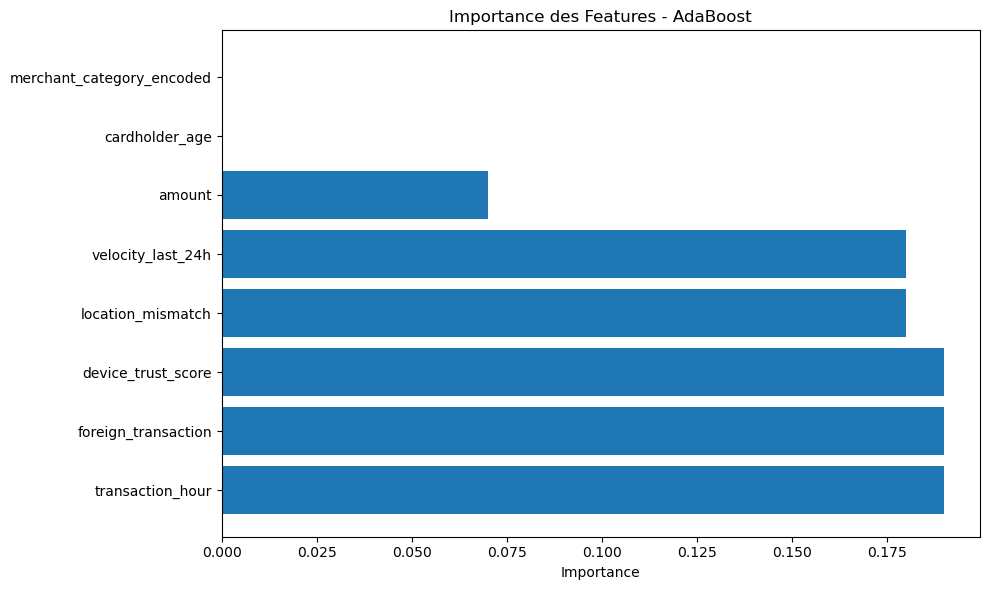


Importance des features pour AdaBoost:
                     Feature  Importance
1           transaction_hour        0.19
2        foreign_transaction        0.19
4         device_trust_score        0.19
3          location_mismatch        0.18
5          velocity_last_24h        0.18
0                     amount        0.07
6             cardholder_age        0.00
7  merchant_category_encoded        0.00


<Figure size 640x480 with 0 Axes>

In [4]:
def analyze_feature_importance(best_model_name, best_model):
    """Analyser l'importance des features pour le meilleur modèle"""
    
    feature_names = X.columns.tolist()
    
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        
        # Créer un dataframe d'importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        # Visualisation
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.barh(range(len(importance_df)), importance_df['Importance'])
        ax.set_yticks(range(len(importance_df)))
        ax.set_yticklabels(importance_df['Feature'])
        ax.set_xlabel('Importance')
        ax.set_title(f'Importance des Features - {best_model_name}')
        plt.tight_layout()
        plt.show()
        plt.savefig(f'importance_des_features_{best_model_name}')
        
        return importance_df
    
    elif hasattr(best_model, 'coef_'):
        # Pour la régression logistique
        coef = best_model.coef_[0]
        
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coef
        }).sort_values('Coefficient', key=abs, ascending=False)
        
        # Visualisation
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['red' if c < 0 else 'blue' for c in importance_df['Coefficient']]
        ax.barh(range(len(importance_df)), importance_df['Coefficient'], color=colors)
        ax.set_yticks(range(len(importance_df)))
        ax.set_yticklabels(importance_df['Feature'])
        ax.set_xlabel('Coefficient')
        ax.set_title(f'Coefficients - {best_model_name}')
        plt.tight_layout()
        plt.show()
        plt.savefig(f'coefficients_{best_model_name}')
        
        return importance_df

# Trouver et analyser le meilleur modèle
best_model_idx = display_df['F1-Score'].idxmax()
best_model_name = display_df.loc[best_model_idx, 'Model']
best_model_info = comparer.models[best_model_name]

# Réentraîner le meilleur modèle avec les meilleurs paramètres
final_model = best_model_info['model'].set_params(**eval(display_df.loc[best_model_idx, 'Best Params']))
final_model.fit(X_train_scaled, y_train)

# Analyser l'importance des features
importance_df = analyze_feature_importance(best_model_name, final_model)
print(f"\nImportance des features pour {best_model_name}:")
print(importance_df.head(10))

## 4. Validation Additionnelle

In [5]:
def additional_validation(models_dict, X_test, y_test):
    """Validation additionnelle sur le test set"""
    
    validation_results = []
    
    for name, model_info in models_dict.items():
        # Prédictions
        y_pred = model_info['trained_model'].predict(X_test)
        y_pred_proba = model_info['trained_model'].predict_proba(X_test)[:, 1]
        
        # Métriques détaillées
        metrics = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision_0': precision_score(y_test, y_pred, pos_label=0),
            'Precision_1': precision_score(y_test, y_pred, pos_label=1),
            'Recall_0': recall_score(y_test, y_pred, pos_label=0),
            'Recall_1': recall_score(y_test, y_pred, pos_label=1),
            'F1_0': f1_score(y_test, y_pred, pos_label=0),
            'F1_1': f1_score(y_test, y_pred, pos_label=1),
            'ROC_AUC': roc_auc_score(y_test, y_pred_proba)
        }
        
        validation_results.append(metrics)
    
    return pd.DataFrame(validation_results)

# Préparer les modèles entraînés
trained_models = {}
for name, model_info in comparer.models.items():
    # Trouver le modèle correspondant dans les résultats
    model_row = display_df[display_df['Model'] == name]
    if not model_row.empty:
        best_params = eval(model_row['Best Params'].iloc[0])
        model = model_info['model'].set_params(**best_params)
        model.fit(X_train_scaled, y_train)
        trained_models[name] = {'trained_model': model}

# Validation additionnelle
val_results = additional_validation(trained_models, X_test_scaled, y_test)
print("\n=== VALIDATION ADDITIONNELLE ===")
print(val_results.round(4))


=== VALIDATION ADDITIONNELLE ===
                 Model  Accuracy  Precision_0  Precision_1  Recall_0  \
0  Logistic Regression    0.9585       1.0000       0.2655    0.9579   
1        Decision Tree    0.9995       1.0000       0.9677    0.9995   
2        Random Forest    0.9940       0.9939       1.0000    1.0000   
3    Gradient Boosting    0.9995       1.0000       0.9677    0.9995   
4             AdaBoost    1.0000       1.0000       1.0000    1.0000   
5          Extra Trees    0.9940       0.9985       0.7500    0.9954   
6                  SVM    0.9915       0.9975       0.6757    0.9939   
7  K-Nearest Neighbors    0.9875       0.9914       0.6190    0.9959   

   Recall_1    F1_0    F1_1  ROC_AUC  
0    1.0000  0.9785  0.4196   0.9927  
1    1.0000  0.9997  0.9836   0.9997  
2    0.6000  0.9970  0.7500   0.9999  
3    1.0000  0.9997  0.9836   1.0000  
4    1.0000  1.0000  1.0000   1.0000  
5    0.9000  0.9969  0.8182   0.9981  
6    0.8333  0.9957  0.7463   0.9942  
7    